In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
file_path = "lifestyle_wellbeing_data.csv"
df = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")

In [3]:
print(df.head())

  Timestamp  FRUITS_VEGGIES DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0    7/7/15               3            2               2            5   
1    7/7/15               2            3               4            3   
2    7/7/15               2            3               3            4   
3    7/7/15               3            3              10            3   
4    7/7/15               5            1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  ...  \
0                  0               5            2         0          1  ...   
1                  8              10            5         2          2  ...   
2                  4              10            3         2          2  ...   
3                 10               7            2         5          2  ...   
4                 10               4            2         4          2  ...   

   SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  SUFFICIENT_INCOME  \
0            7    

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [39]:
print(df.describe())

       FRUITS_VEGGIES  PLACES_VISITED   CORE_CIRCLE  SUPPORTING_OTHERS  \
count    15972.000000    15972.000000  15972.000000       15972.000000   
mean         2.922677        5.232970      5.508077           5.616454   
std          1.442694        3.311912      2.840334           3.242021   
min          0.000000        0.000000      0.000000           0.000000   
25%          2.000000        2.000000      3.000000           3.000000   
50%          3.000000        5.000000      5.000000           5.000000   
75%          4.000000        8.000000      8.000000          10.000000   
max          5.000000       10.000000     10.000000          10.000000   

       SOCIAL_NETWORK   ACHIEVEMENT      DONATION  TODO_COMPLETED  \
count    15972.000000  15972.000000  15972.000000    15972.000000   
mean         6.474267      4.000751      2.715314        5.745993   
std          3.086672      2.755837      1.851586        2.624097   
min          0.000000      0.000000      0.000000        

In [6]:
print(df.isnull().sum())

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64


In [8]:
if 'Timestamp' in df.columns:
  df.drop(columns=['Timestamp'], inplace=True)

In [9]:
df = pd.get_dummies(df, columns=['GENDER', 'BMI_RANGE'], drop_first=True)

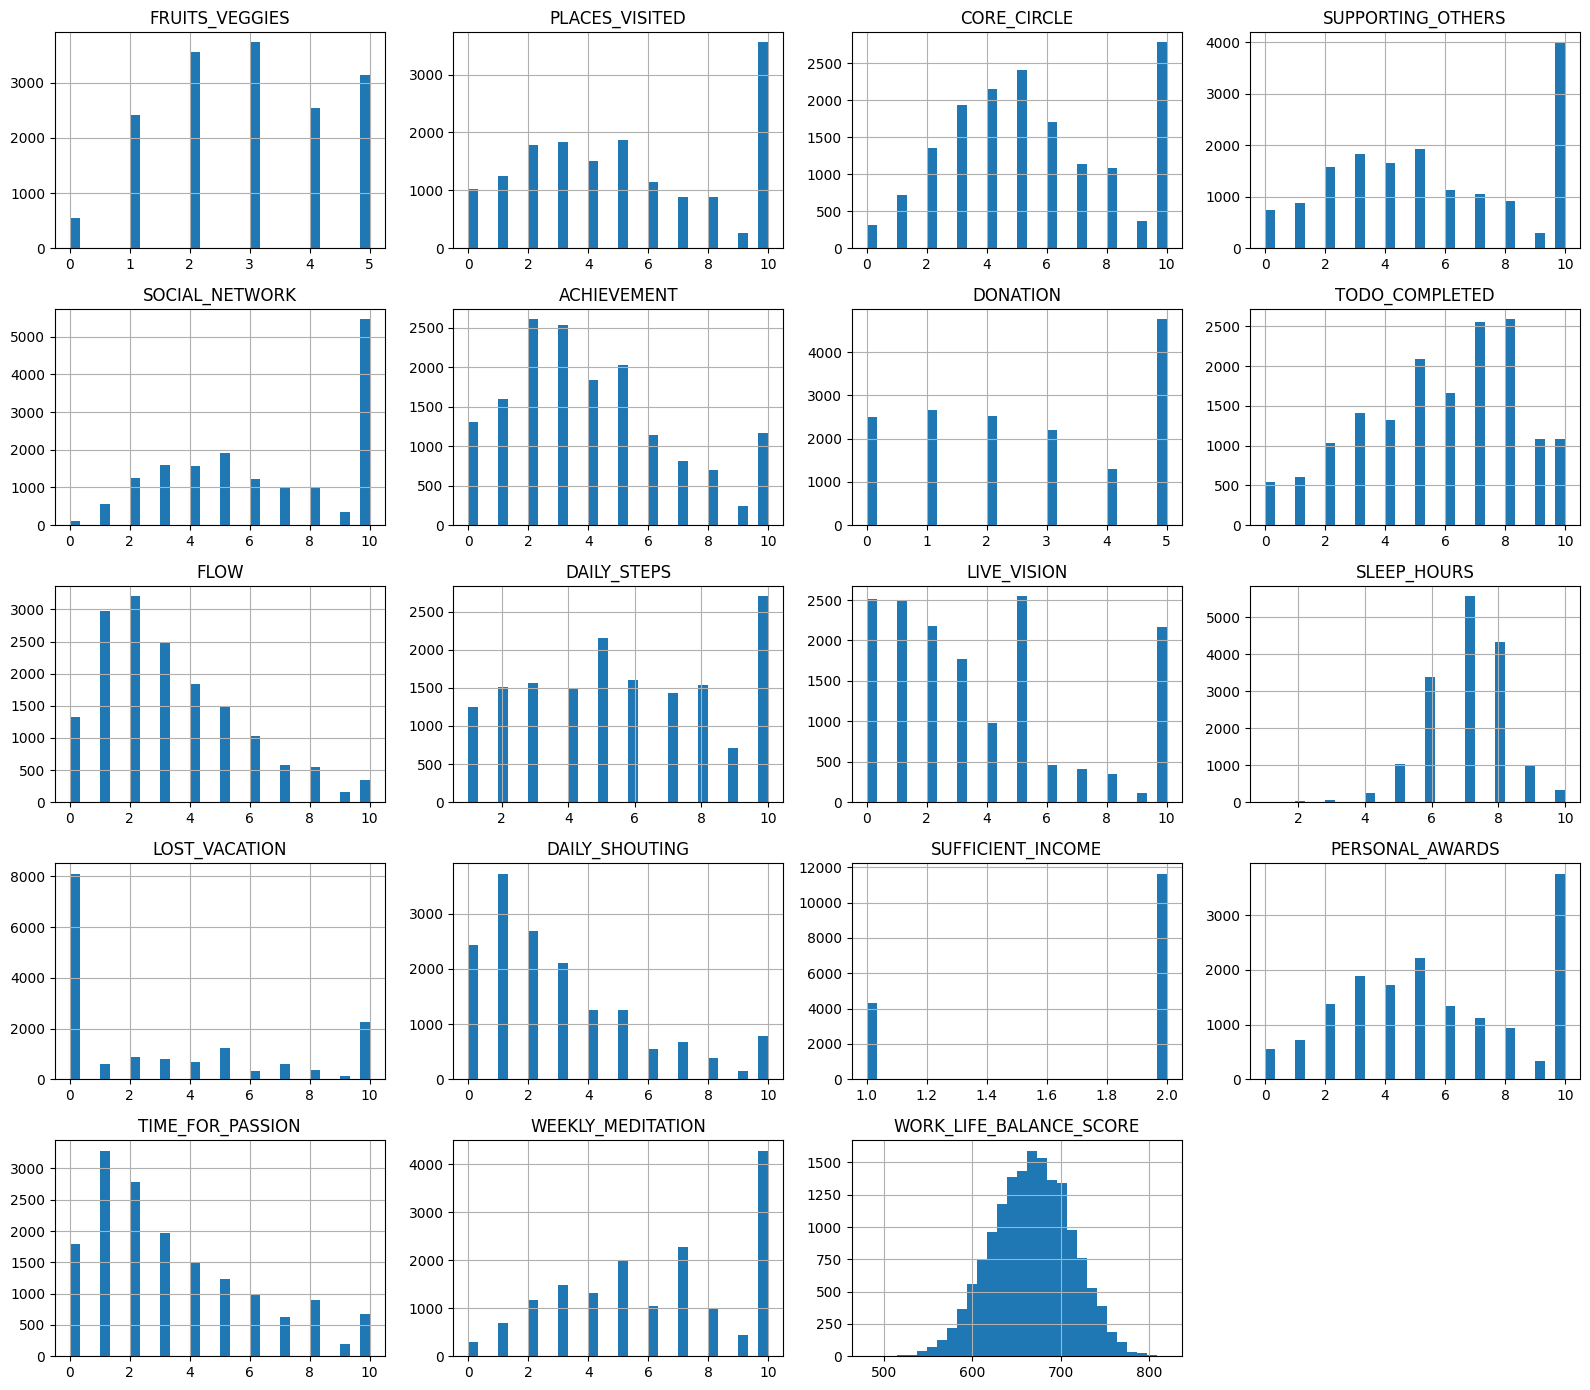

In [10]:
# Histograms for numeric variables
df.hist(figsize=(16, 14), bins=30)
plt.tight_layout()
plt.show()

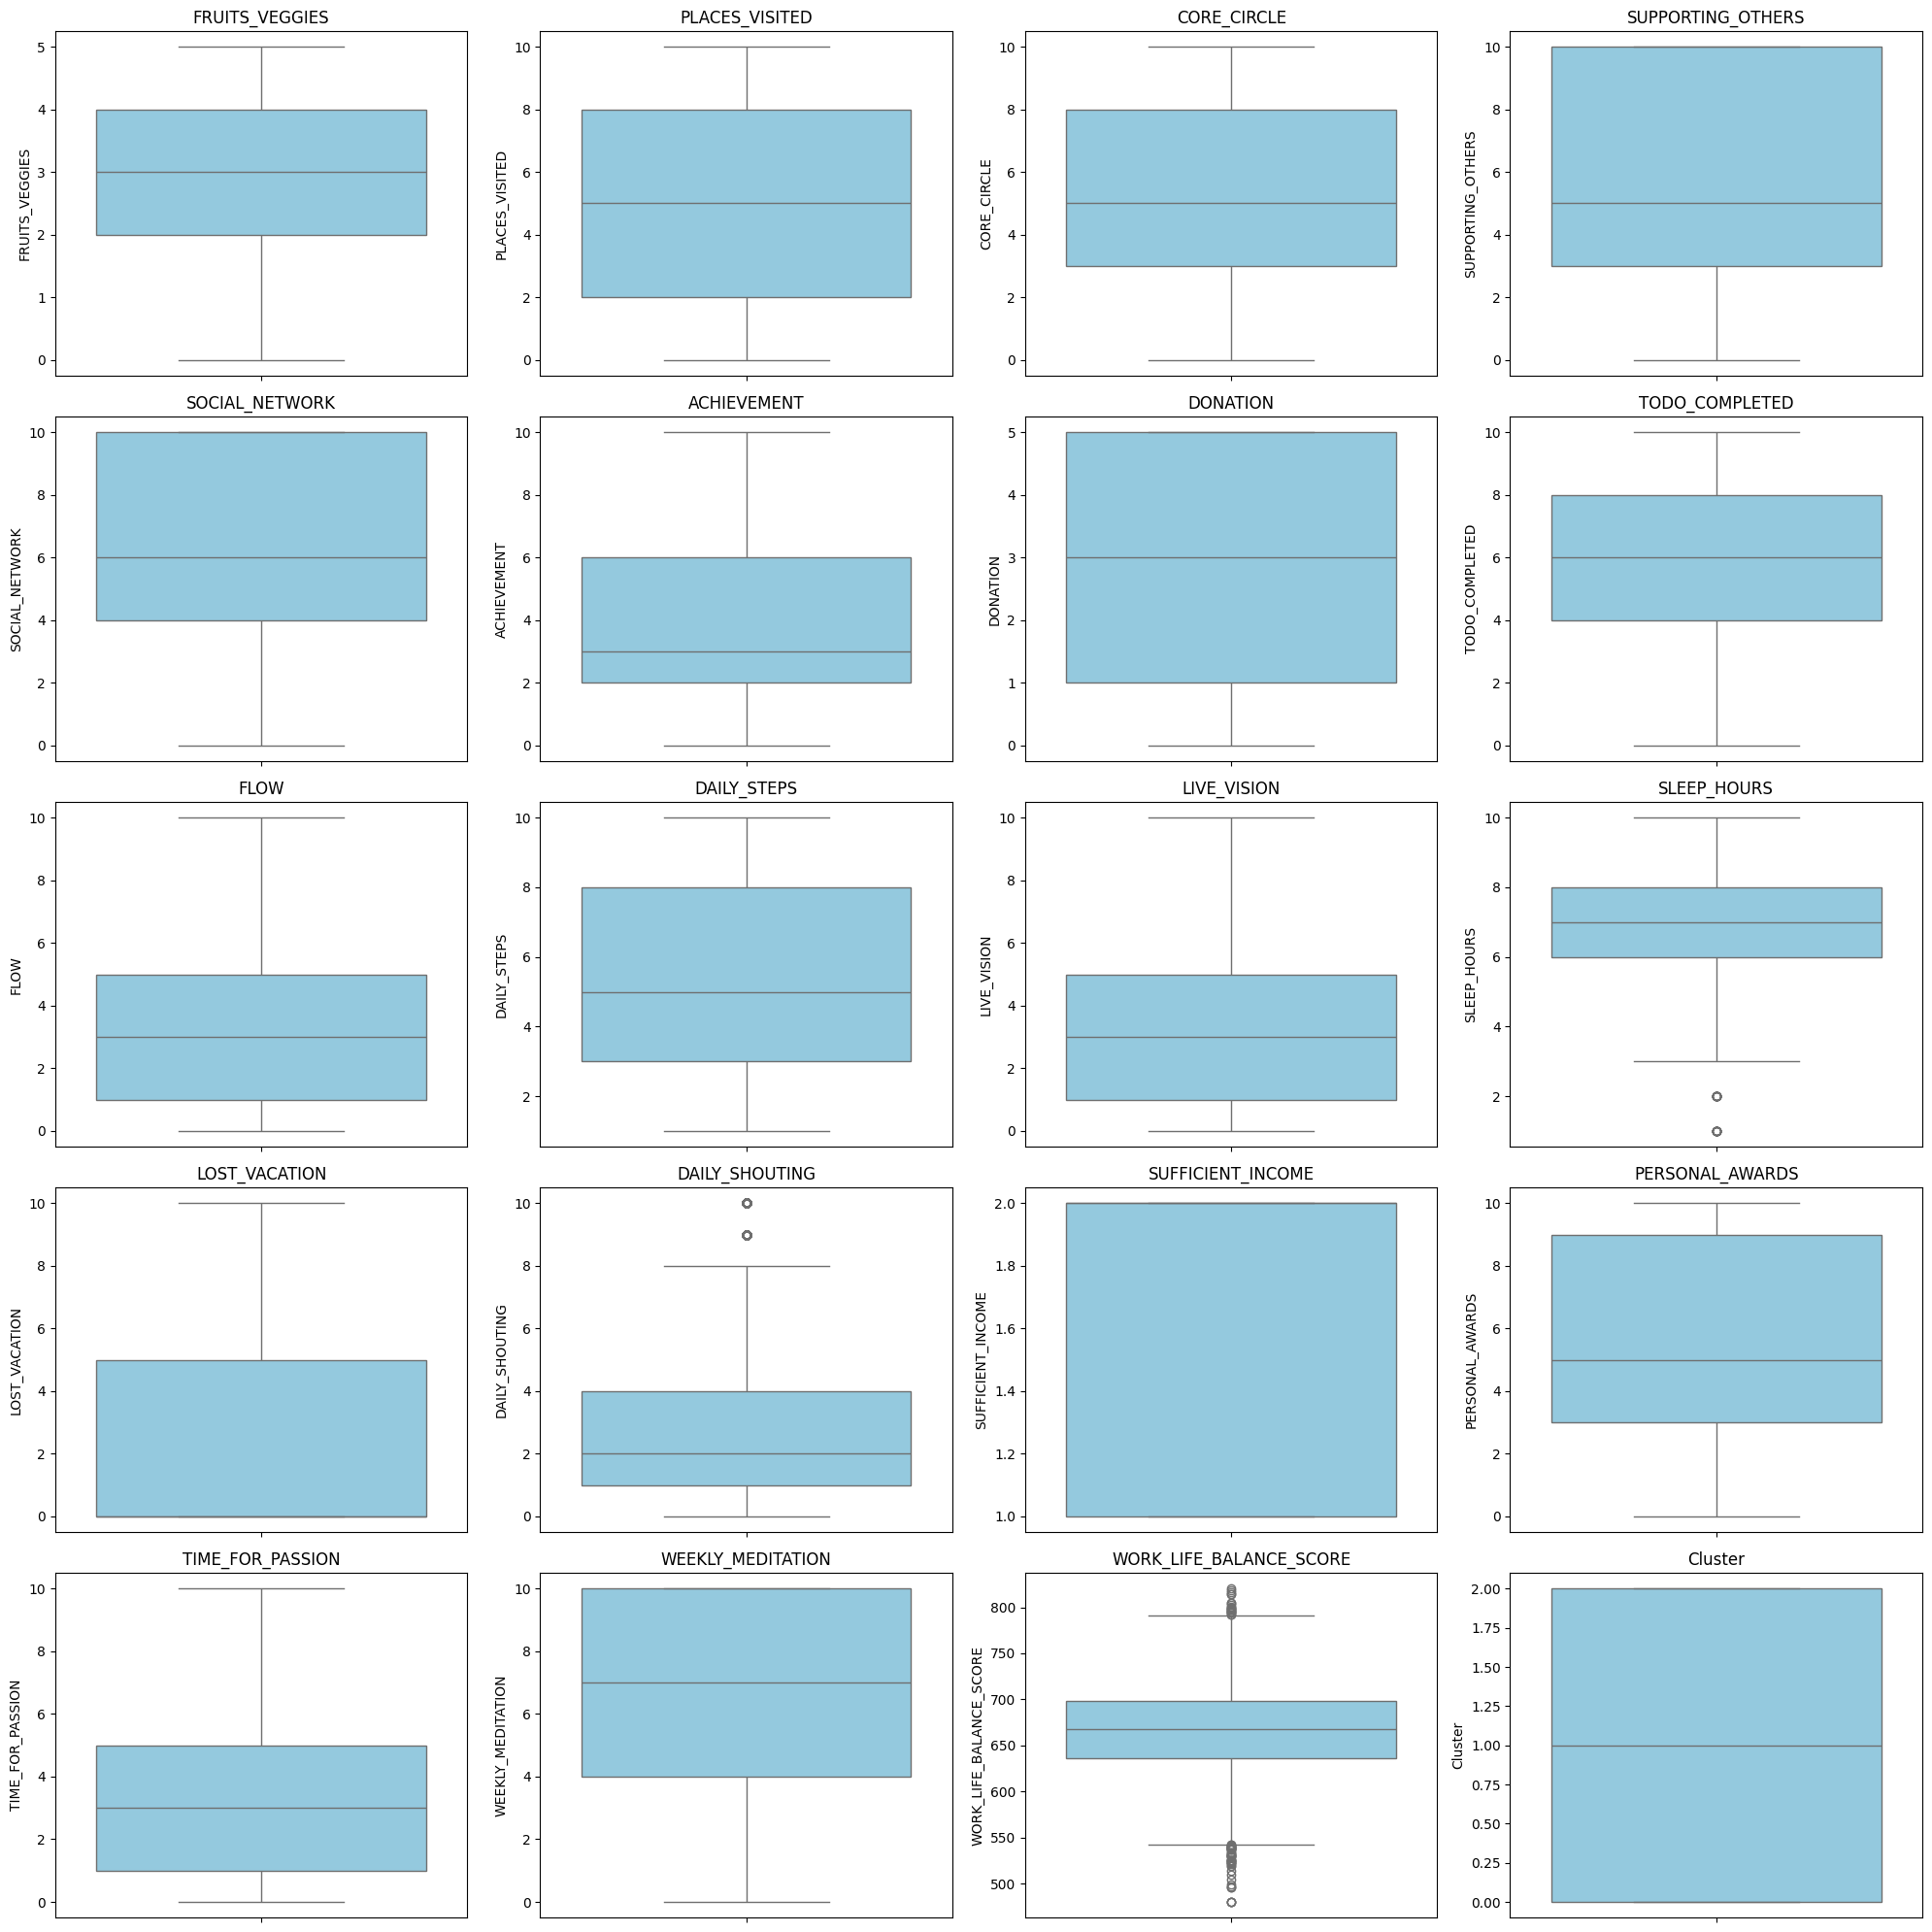

In [42]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Set up the subplot grid
n_cols = 4  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


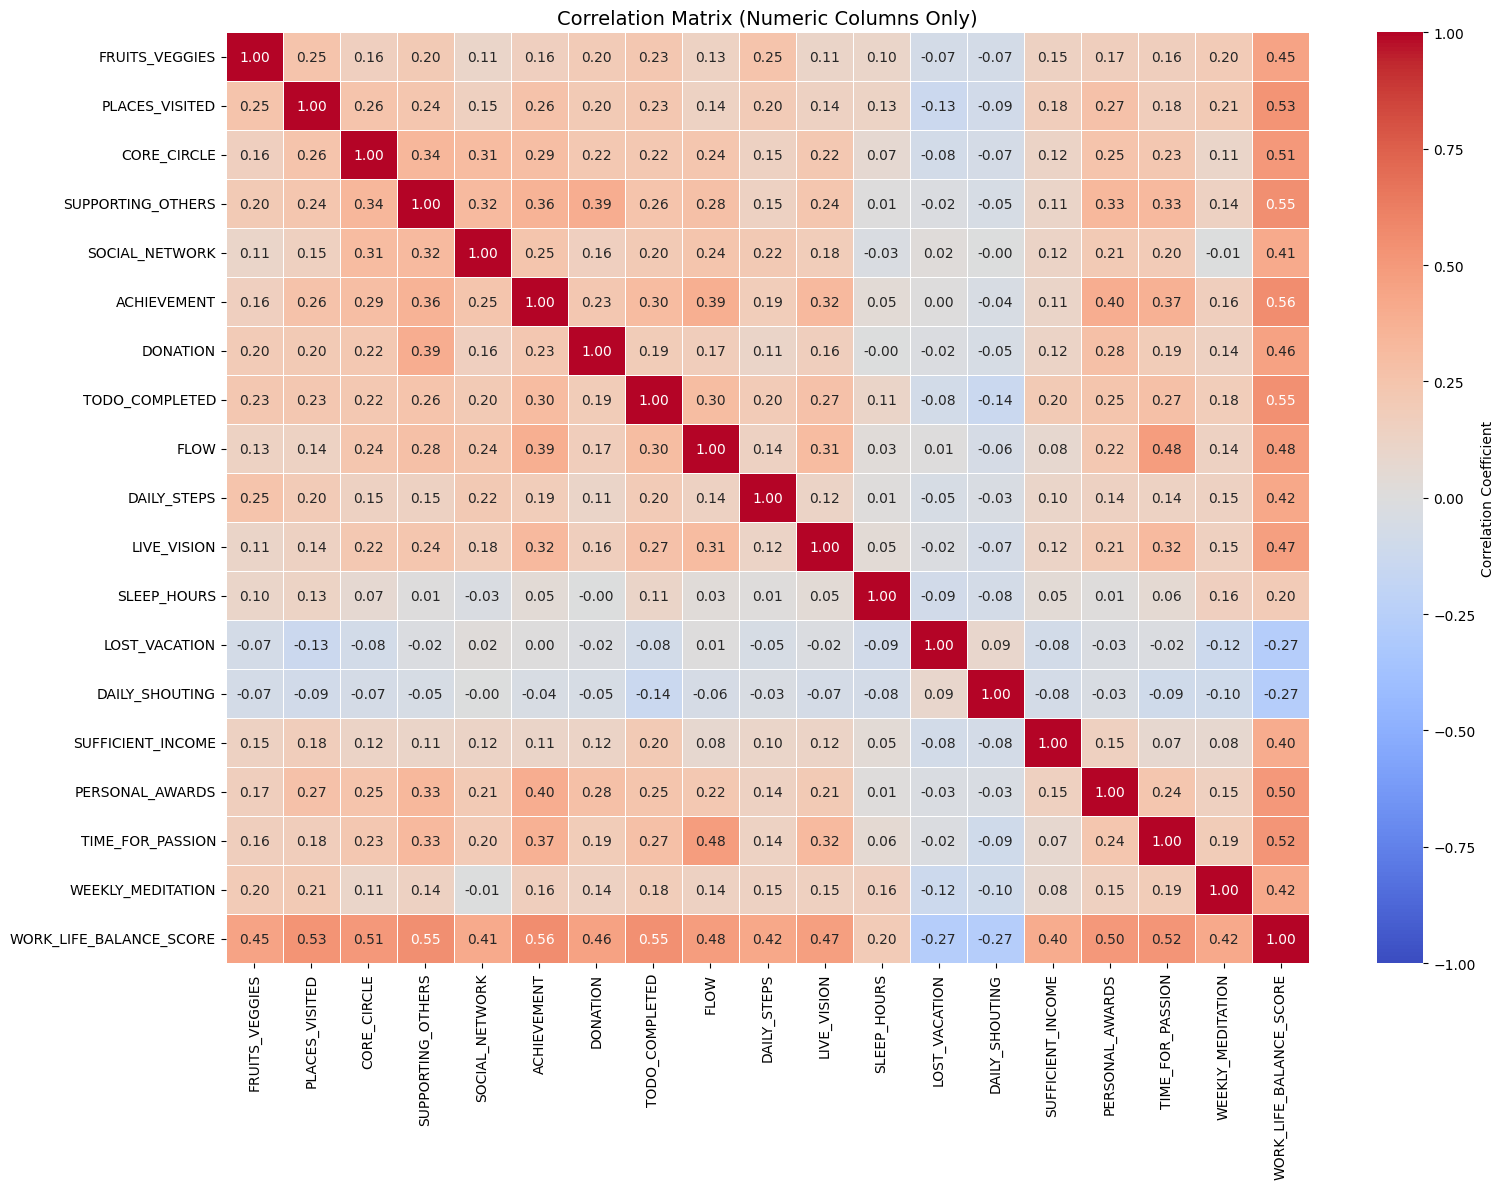

In [17]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",   
    center=0,
    vmin=-1,           
    vmax=1,            
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"}
)

plt.title("Correlation Matrix (Numeric Columns Only)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
# Separate target
y = df['WORK_LIFE_BALANCE_SCORE']

# Select ONLY numeric predictors
X = df.drop(columns=['WORK_LIFE_BALANCE_SCORE'])
X = X.select_dtypes(include='number')

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
# 7. Principal Component Analysis (PCA)
# Fit PCA on scaled features
pca = PCA()
pca.fit(X_scaled)

PCA()

In [33]:
# Explained variance (cumulative, first 5 PCs)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

for i in range(5):
    print(f"PC{i+1} cumulative explained variance: {cumulative_variance[i]:.3f}")

print("Total explained variance (5 PCs):", cumulative_variance[4])


PC1 cumulative explained variance: 0.225
PC2 cumulative explained variance: 0.306
PC3 cumulative explained variance: 0.372
PC4 cumulative explained variance: 0.428
PC5 cumulative explained variance: 0.484
Total explained variance (5 PCs): 0.4837037905801658


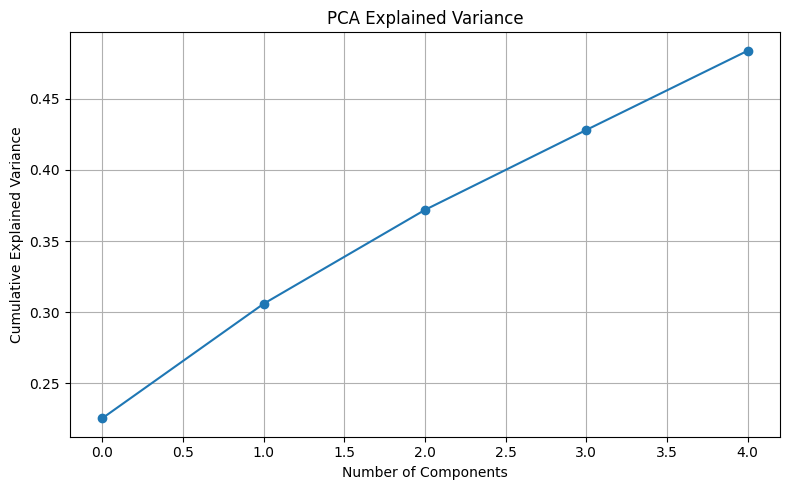

In [35]:
# Plot (first 5 components, as in your project)
plt.figure(figsize=(8, 5))
plt.plot(
    range(len(cum_var[:5])),
    cum_var[:5],
    marker='o'
)

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# 8. Regression Model
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42
)


reg = LinearRegression()
reg.fit(X_train, y_train)


y_pred = reg.predict(X_test)

In [25]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 88.07095735967152
MAE: 8.219107222992026
R2 Score: 0.9556683804112612


In [26]:
# Coefficients
coef_df = pd.DataFrame({
'Feature': X.columns,
'Coefficient': reg.coef_
}).sort_values(by='Coefficient', ascending=False)


print(coef_df.head(10))
print(coef_df.tail(10))

              Feature  Coefficient
14  SUFFICIENT_INCOME     7.866518
9         DAILY_STEPS     6.483602
1      PLACES_VISITED     6.457541
17  WEEKLY_MEDITATION     6.147584
10        LIVE_VISION     5.688326
6            DONATION     5.430811
0      FRUITS_VEGGIES     5.382887
2         CORE_CIRCLE     5.233401
7      TODO_COMPLETED     4.981516
5         ACHIEVEMENT     4.939080
              Feature  Coefficient
7      TODO_COMPLETED     4.981516
5         ACHIEVEMENT     4.939080
16   TIME_FOR_PASSION     4.919536
3   SUPPORTING_OTHERS     4.841286
4      SOCIAL_NETWORK     4.768160
15    PERSONAL_AWARDS     4.740306
8                FLOW     3.831377
11        SLEEP_HOURS     3.278931
13     DAILY_SHOUTING    -6.057611
12      LOST_VACATION    -6.840100


In [27]:
# 9. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Cluster sizes
print(df['Cluster'].value_counts())

Cluster
0    6813
2    4895
1    4264
Name: count, dtype: int64


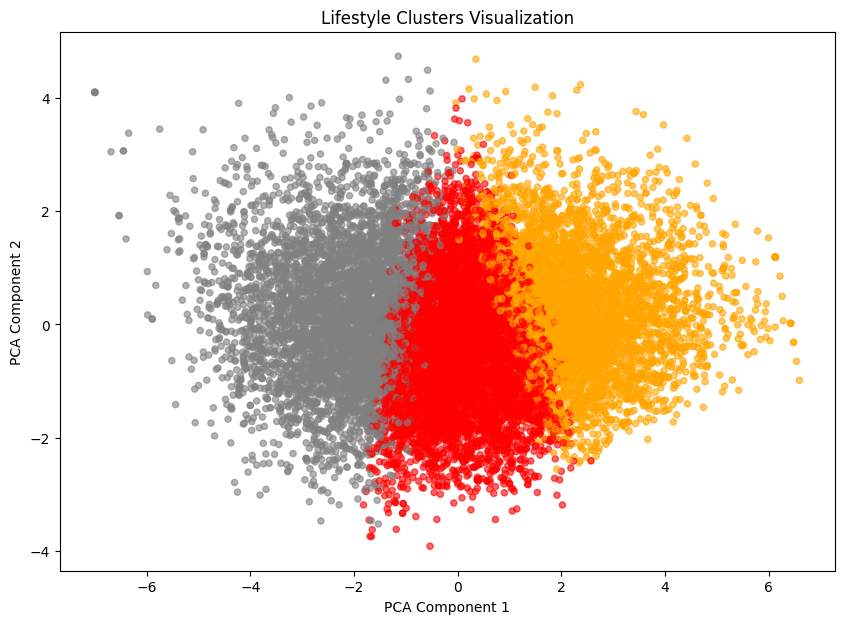

In [30]:
# Define exact colors for clusters
cluster_colors = {
    0: 'red',
    1: 'orange',
    2: 'gray'
}

# Map colors to each point
colors = df['Cluster'].map(cluster_colors)

plt.figure(figsize=(10, 7))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=colors,
    alpha=0.6,
    s=20
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Lifestyle Clusters Visualization")
plt.show()


In [43]:
cluster_sizes = df['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

Cluster Sizes:
 Cluster
0    6813
2    4895
1    4264
Name: count, dtype: int64


In [45]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# remove the Cluster column from features to avoid including it in mean
numeric_cols.remove('Cluster')

cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
print("\nCluster Feature Means:\n", cluster_summary)


Cluster Feature Means:
          FRUITS_VEGGIES  PLACES_VISITED  CORE_CIRCLE  SUPPORTING_OTHERS  \
Cluster                                                                   
0              3.154998        5.785997     5.709086           5.748275   
1              3.469981        6.790807     7.289165           8.109991   
2              2.122574        3.106231     3.676813           3.260878   

         SOCIAL_NETWORK  ACHIEVEMENT  DONATION  TODO_COMPLETED      FLOW  \
Cluster                                                                    
0              6.640980     3.717305  2.917070        6.234405  2.777484   
1              8.104831     6.536351  3.670028        7.263368  5.274625   
2              4.821859     2.186517  1.602860        3.744433  1.963841   

         DAILY_STEPS  LIVE_VISION  SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  \
Cluster                                                                         
0           5.981066     3.373551     7.152649       2.4

In [46]:
gender_cols = [col for col in df.columns if 'GENDER' in col]
cluster_gender = df.groupby('Cluster')[gender_cols].sum()
print("\nGender Distribution per Cluster:\n", cluster_gender)



Gender Distribution per Cluster:
          GENDER_Male
Cluster             
0               2361
1               1570
2               2183
